# Red Wine Quality Prediction

In [18]:
import pandas as pd
import matplotlib .pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  r2_score
from sklearn.model_selection import train_test_split

In [19]:
#importing dataset
df = pd.read_csv("RED WINE QUALITY.CSV")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [20]:
df.shape

(1599, 12)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


as we can see there are two types of datatypes observed in the dataset integer and float.


In [22]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [36]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

as we can see there are no null values

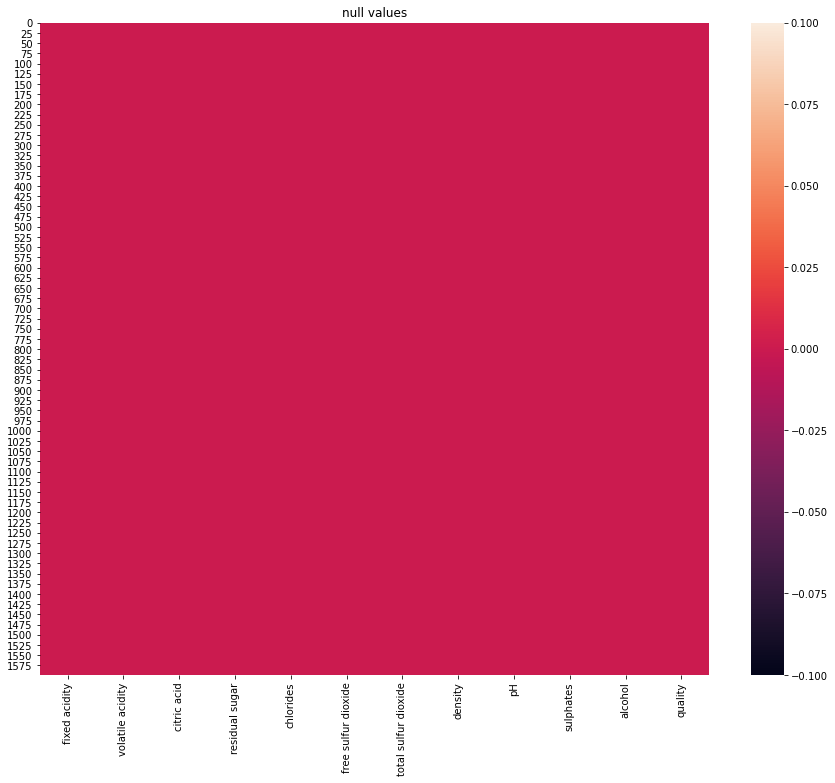

In [24]:
plt.figure(figsize = [15,12])
sns.heatmap(df.isnull())
plt.title("null values")
plt.show()


In [25]:
df["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [54]:
df['class']=[1 if x>=7 else 0 for x in df['quality']]
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


In [55]:
df['class'].value_counts()

0    1382
1     217
Name: class, dtype: int64

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

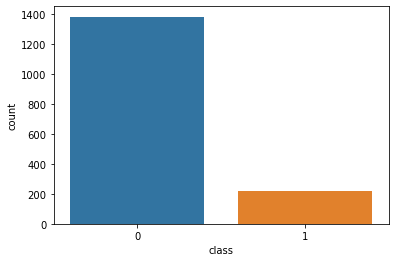

In [56]:
sns.countplot(df['class'])


# checking for data correlation

In [57]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052,0.120061
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558,-0.270712
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373,0.214716
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732,0.047779
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907,-0.097308
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656,-0.071747
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100,-0.139517
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919,-0.150460
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731,-0.057283
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397,0.199485


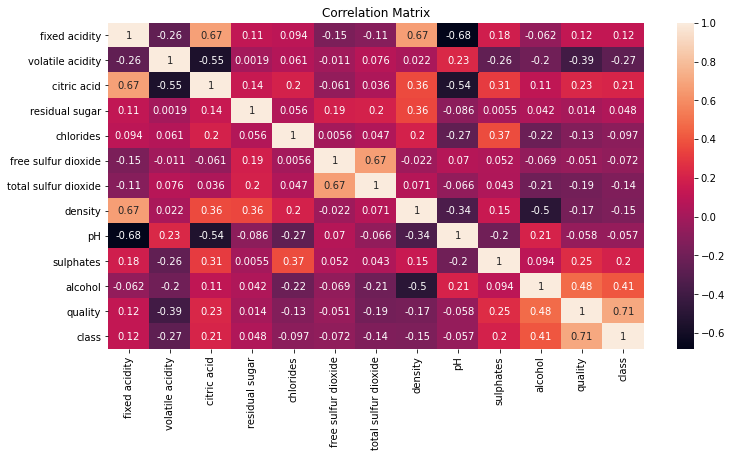

In [58]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()


volatility acidity has least correlation and alcohol has most correlation.

<function matplotlib.pyplot.show(close=None, block=None)>

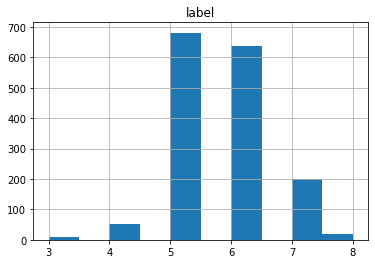

In [59]:
df["quality"].hist(grid=True)
plt.title('label')
plt.show

fixed acidity              AxesSubplot(0.125,0.536818;0.0945122x0.343182)
volatile acidity        AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
citric acid             AxesSubplot(0.351829,0.536818;0.0945122x0.343182)
residual sugar          AxesSubplot(0.465244,0.536818;0.0945122x0.343182)
chlorides               AxesSubplot(0.578659,0.536818;0.0945122x0.343182)
free sulfur dioxide     AxesSubplot(0.692073,0.536818;0.0945122x0.343182)
total sulfur dioxide    AxesSubplot(0.805488,0.536818;0.0945122x0.343182)
density                       AxesSubplot(0.125,0.125;0.0945122x0.343182)
pH                         AxesSubplot(0.238415,0.125;0.0945122x0.343182)
sulphates                  AxesSubplot(0.351829,0.125;0.0945122x0.343182)
alcohol                    AxesSubplot(0.465244,0.125;0.0945122x0.343182)
quality                    AxesSubplot(0.578659,0.125;0.0945122x0.343182)
class                      AxesSubplot(0.692073,0.125;0.0945122x0.343182)
dtype: object

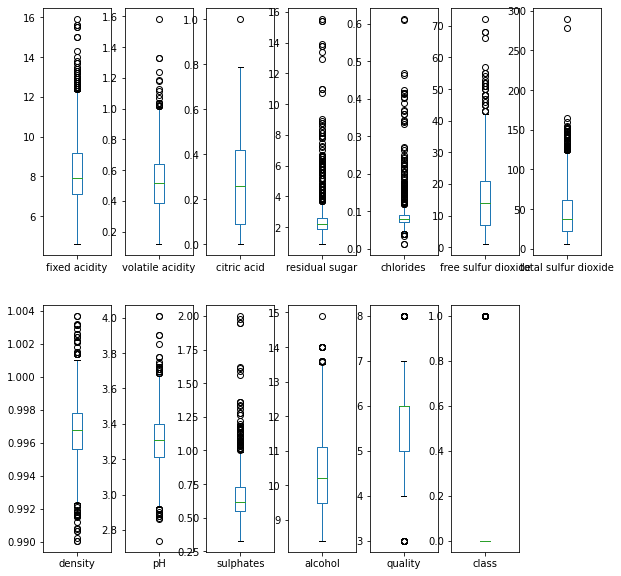

In [60]:
df.plot(kind='box',subplots=True,layout=(2,7),figsize=(10,10))

as we can see the are outliers present

In [61]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'class'],
      dtype='object')

# Data Cleansing

removing outliers 

In [62]:
from scipy.stats import zscore

In [63]:
z=np.abs(zscore(df))
z

array([[0.52835961, 0.96187667, 1.39147228, ..., 0.96024611, 0.78782264,
        0.39625599],
       [0.29854743, 1.96744245, 1.39147228, ..., 0.58477711, 0.78782264,
        0.39625599],
       [0.29854743, 1.29706527, 1.18607043, ..., 0.58477711, 0.78782264,
        0.39625599],
       ...,
       [1.1603431 , 0.09955388, 0.72391627, ..., 0.54162988, 0.45084835,
        0.39625599],
       [1.39015528, 0.65462046, 0.77526673, ..., 0.20930812, 0.78782264,
        0.39625599],
       [1.33270223, 1.21684919, 1.02199944, ..., 0.54162988, 0.45084835,
        0.39625599]])

In [64]:
threshold=3
print(np.where(z>3))

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
         45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
        106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
        151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
        244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
        354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
        459,  467,  480,  480,  494,  515,  517,  544,  554,  554,  555,
        555,  557,  557,  568,  584,  588,  591,  595,  608,  614,  636,
        639,  649,  649,  651,  652,  652,  652,  672,  672,  684,  690,
        690,  692,  692,  695,  723,  724,  730,  754,  776,  777,  795,
        821,  832,  836,  837,  889,  899,  911,  917,  923,  925,  926,
        982, 1017, 1018, 1043, 1051, 1051, 1071, 1074, 1079, 1079, 1081,
       1081, 1111, 1114, 1131, 1154, 1165, 1175, 1186, 1231, 1235, 1244,
       1244, 1244, 1260, 1269, 1269, 1270, 1270, 1

In [65]:
df_new=df[(z<3).all(axis=1)]
df_new


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


In [66]:
df.shape

(1599, 13)

In [67]:
df_new.shape

(1451, 13)

data loss percentage

In [68]:
loss_percent=(1500-1451)/1599*100
loss_percent

3.0644152595372107

outliers are removed

# EDA

<AxesSubplot:xlabel='class', ylabel='residual sugar'>

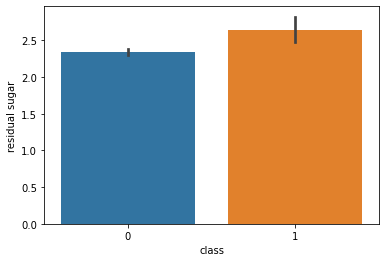

In [74]:
sns.barplot(x='class',y='residual sugar',data=df_new)

<AxesSubplot:xlabel='class', ylabel='fixed acidity'>

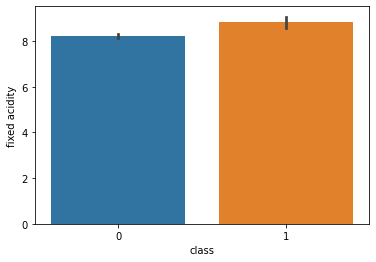

In [75]:
sns.barplot(x='class',y='fixed acidity',data=df_new)

<AxesSubplot:xlabel='class', ylabel='citric acid'>

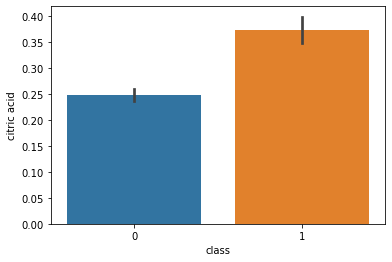

In [76]:
sns.barplot(x='class',y='citric acid',data=df_new)

<AxesSubplot:xlabel='class', ylabel='density'>

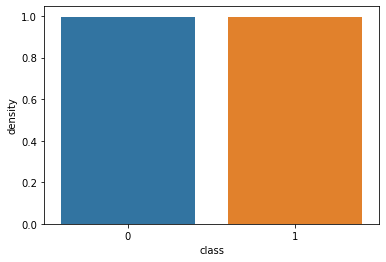

In [77]:
sns.barplot(x='class',y='density',data=df_new)


<AxesSubplot:xlabel='class', ylabel='free sulfur dioxide'>

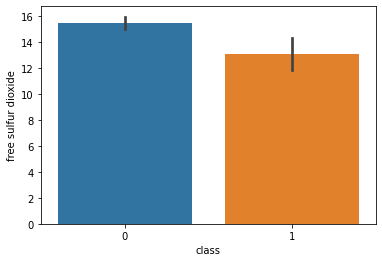

In [78]:
sns.barplot(x='class',y='free sulfur dioxide',data=df_new)

<AxesSubplot:xlabel='class', ylabel='pH'>

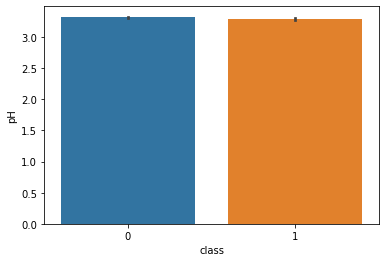

In [79]:
sns.barplot(x='class',y='pH',data=df_new)

In [81]:
df2=df_new.drop(['free sulfur dioxide','pH','density','chlorides','quality'],axis=1)

In [82]:
df2

,fixed acidity,volatile acidity,citric acid,residual sugar,total sulfur dioxide,sulphates,alcohol,class
0,7.4,0.700,0.00,1.9,34.0,0.56,9.4,0
1,7.8,0.880,0.00,2.6,67.0,0.68,9.8,0
2,7.8,0.760,0.04,2.3,54.0,0.65,9.8,0
3,11.2,0.280,0.56,1.9,60.0,0.58,9.8,0
4,7.4,0.700,0.00,1.9,34.0,0.56,9.4,0
...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,44.0,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,51.0,0.76,11.2,0
1596,6.3,0.510,0.13,2.3,40.0,0.75,11.0,0
1597,5.9,0.645,0.12,2.0,44.0,0.71,10.2,0


# checking skewness

In [83]:
df2.skew()

fixed acidity           0.823934
volatile acidity        0.380659
citric acid             0.291297
residual sugar          2.456107
total sulfur dioxide    1.183161
sulphates               0.891492
alcohol                 0.758958
class                   2.094941
dtype: float64

In [84]:
df2.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,total sulfur dioxide,sulphates,alcohol,class
count,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000
mean,8.310062,0.522950,0.265382,2.387285,43.735355,0.642584,10.421089,0.138525
std,1.646458,0.168531,0.190934,0.862078,29.441284,0.129801,1.021588,0.345569
min,5.000000,0.120000,0.000000,1.200000,6.000000,0.330000,8.500000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,21.000000,0.550000,9.500000,0.000000
50%,7.900000,0.520000,0.250000,2.200000,36.000000,0.620000,10.200000,0.000000
75%,9.200000,0.630000,0.420000,2.600000,58.000000,0.720000,11.100000,0.000000
max,13.500000,1.040000,0.790000,6.700000,145.000000,1.160000,13.600000,1.000000


C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fixed acidity', ylabel='Density'>

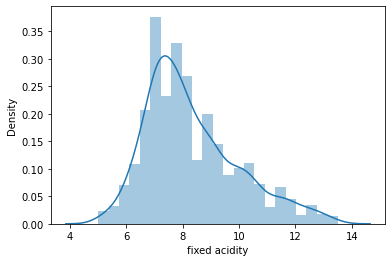

In [85]:
sns.distplot(df2['fixed acidity'])

C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='volatile acidity', ylabel='Density'>

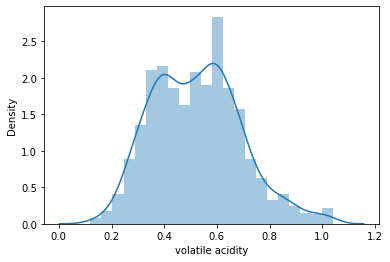

In [86]:
sns.distplot(df2['volatile acidity'])

C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='citric acid', ylabel='Density'>

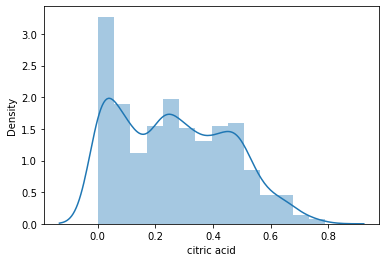

In [87]:
sns.distplot(df2['citric acid'])

C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='residual sugar', ylabel='Density'>

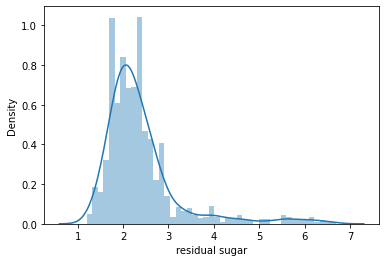

In [88]:
sns.distplot(df2['residual sugar'])

C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sulphates', ylabel='Density'>

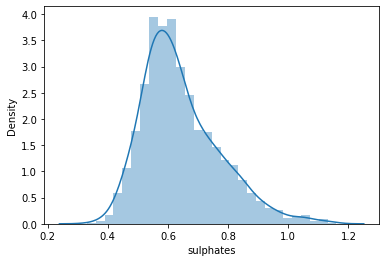

In [89]:
sns.distplot(df2['sulphates'])

as we can see there is skewness in the data

# now balancing the data

In [90]:
dfx=df2.iloc[:,0:-1]
dfy=df2.iloc[:,-1]

In [91]:
dfx

,fixed acidity,volatile acidity,citric acid,residual sugar,total sulfur dioxide,sulphates,alcohol
0,7.4,0.700,0.00,1.9,34.0,0.56,9.4
1,7.8,0.880,0.00,2.6,67.0,0.68,9.8
2,7.8,0.760,0.04,2.3,54.0,0.65,9.8
3,11.2,0.280,0.56,1.9,60.0,0.58,9.8
4,7.4,0.700,0.00,1.9,34.0,0.56,9.4
...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,44.0,0.58,10.5
1595,5.9,0.550,0.10,2.2,51.0,0.76,11.2
1596,6.3,0.510,0.13,2.3,40.0,0.75,11.0
1597,5.9,0.645,0.12,2.0,44.0,0.71,10.2


In [92]:
from imblearn.over_sampling import SMOTE

sm=SMOTE()
x,y=sm.fit_resample(dfx,dfy)

In [93]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,total sulfur dioxide,sulphates,alcohol
0,7.400000,0.700000,0.000000,1.900000,34.000000,0.560000,9.400000
1,7.800000,0.880000,0.000000,2.600000,67.000000,0.680000,9.800000
2,7.800000,0.760000,0.040000,2.300000,54.000000,0.650000,9.800000
3,11.200000,0.280000,0.560000,1.900000,60.000000,0.580000,9.800000
4,7.400000,0.700000,0.000000,1.900000,34.000000,0.560000,9.400000
...,...,...,...,...,...,...,...
2495,10.141252,0.481813,0.604125,2.246251,15.256249,0.667687,11.979374
2496,8.664320,0.284582,0.350925,2.226871,47.000000,0.790925,11.108810
2497,11.025993,0.400017,0.515043,1.524957,41.249568,0.772478,10.124611
2498,10.687070,0.360344,0.537112,2.587070,15.935349,0.650647,11.051721


In [94]:
df3=x.copy()

In [95]:
df3

,fixed acidity,volatile acidity,citric acid,residual sugar,total sulfur dioxide,sulphates,alcohol
0,7.400000,0.700000,0.000000,1.900000,34.000000,0.560000,9.400000
1,7.800000,0.880000,0.000000,2.600000,67.000000,0.680000,9.800000
2,7.800000,0.760000,0.040000,2.300000,54.000000,0.650000,9.800000
3,11.200000,0.280000,0.560000,1.900000,60.000000,0.580000,9.800000
4,7.400000,0.700000,0.000000,1.900000,34.000000,0.560000,9.400000
...,...,...,...,...,...,...,...
2495,10.141252,0.481813,0.604125,2.246251,15.256249,0.667687,11.979374
2496,8.664320,0.284582,0.350925,2.226871,47.000000,0.790925,11.108810
2497,11.025993,0.400017,0.515043,1.524957,41.249568,0.772478,10.124611
2498,10.687070,0.360344,0.537112,2.587070,15.935349,0.650647,11.051721


In [96]:
y.value_counts()

1    1250
0    1250
Name: class, dtype: int64

the dataset is balanced

# removing the skewness now

In [98]:
from sklearn.preprocessing import power_transform

df3=power_transform(df3,method=('yeo-johnson'))
df3

array([[-0.62560507,  1.35878704, -1.66815601, ...,  0.16474471,
        -0.97355182, -1.42121416],
       [-0.34364135,  2.03947174, -1.66815601, ...,  1.15829438,
         0.04411182, -0.99985052],
       [-0.34364135,  1.606354  , -1.45207046, ...,  0.8445306 ,
        -0.19502223, -0.99985052],
       ...,
       [ 1.44330271, -0.32454788,  1.10211398, ...,  0.44976591,
         0.7253381 , -0.670944  ],
       [ 1.28714582, -0.62330863,  1.22030254, ..., -0.96029737,
        -0.1897677 ,  0.21057245],
       [ 1.09148712, -1.09222171,  1.02001464, ..., -1.25572869,
         0.49518319, -0.24950377]])

In [99]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
df3=sc.fit_transform(df3)
df3

array([[-0.62560507,  1.35878704, -1.66815601, ...,  0.16474471,
        -0.97355182, -1.42121416],
       [-0.34364135,  2.03947174, -1.66815601, ...,  1.15829438,
         0.04411182, -0.99985052],
       [-0.34364135,  1.606354  , -1.45207046, ...,  0.8445306 ,
        -0.19502223, -0.99985052],
       ...,
       [ 1.44330271, -0.32454788,  1.10211398, ...,  0.44976591,
         0.7253381 , -0.670944  ],
       [ 1.28714582, -0.62330863,  1.22030254, ..., -0.96029737,
        -0.1897677 ,  0.21057245],
       [ 1.09148712, -1.09222171,  1.02001464, ..., -1.25572869,
         0.49518319, -0.24950377]])

In [100]:
df4=pd.DataFrame(df3)
df4

,0,1,2,3,4,5,6
0,-0.625605,1.358787,-1.668156,-0.677714,0.164745,-0.973552,-1.421214
1,-0.343641,2.039472,-1.668156,0.588865,1.158294,0.044112,-0.999851
2,-0.343641,1.606354,-1.452070,0.148304,0.844531,-0.195022,-0.999851
3,1.521230,-1.305203,1.342844,-0.677714,0.998069,-0.792085,-0.999851
4,-0.625605,1.358787,-1.668156,-0.677714,0.164745,-0.973552,-1.421214
...,...,...,...,...,...,...,...
2495,1.022633,0.225194,1.578976,0.055553,-1.024967,-0.052885,1.017463
2496,0.211495,-1.263245,0.221971,0.020913,0.641429,0.851966,0.262273
2497,1.443303,-0.324548,1.102114,-1.857299,0.449766,0.725338,-0.670944
2498,1.287146,-0.623309,1.220303,0.572227,-0.960297,-0.189768,0.210572


In [101]:
y

0       0
1       0
2       0
3       0
4       0
       ..
2495    1
2496    1
2497    1
2498    1
2499    1
Name: class, Length: 2500, dtype: int64

# PCA

In [103]:
from sklearn.decomposition import PCA
for i in range(0,7):
    pca=PCA(n_components=i)
    prin=pca.fit_transform(df3)
    print(i,sum(pca.explained_variance_ratio_))

0 0
1 0.3736122586694055
2 0.5564606686968536
3 0.7075444221096523
4 0.8487236492422885
5 0.9219590797439534
6 0.9757396821598173


# finding the best random state

In [105]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LassoLars
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_auc_score,roc_curve
import joblib

In [118]:
lg=LogisticRegression()

for i in range(10,200):
    xtrain,xtest,ytrain,ytest=train_test_split(df3,y,test_size=0.20,random_state=i)
    lg.fit(xtrain,ytrain)
    pred_train=lg.predict(xtrain)
    pred_test=lg.predict(xtest)
    if round(accuracy_score(ytrain,pred_train)*100,1)==round(accuracy_score(ytest,pred_test)*100,1):
        print('At random state :- ',i)
        print('training score is :',accuracy_score(ytrain,pred_train)*100)
        print('testing score is :',accuracy_score(ytest,pred_test)*100)
        print('\n')

At random state :-  16
training score is : 82.65
testing score is : 82.6


At random state :-  25
training score is : 82.55
testing score is : 82.6


At random state :-  57
training score is : 82.35
testing score is : 82.39999999999999


At random state :-  116
training score is : 82.35
testing score is : 82.39999999999999


At random state :-  150
training score is : 82.25
testing score is : 82.19999999999999


At random state :-  197
training score is : 82.39999999999999
testing score is : 82.39999999999999




In [121]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=116)

In [123]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
LR = LogisticRegression()
LR.fit(x_train, y_train)
pred = LR.predict(x_test)
print(accuracy_score(y_test, pred)*100)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
print('f1 Score:',f1_score(y_test, pred)*100)

84.48484848484848
[[328  82]
 [ 46 369]]
              precision    recall  f1-score   support

           0       0.88      0.80      0.84       410
           1       0.82      0.89      0.85       415

    accuracy                           0.84       825
   macro avg       0.85      0.84      0.84       825
weighted avg       0.85      0.84      0.84       825

f1 Score: 85.21939953810623


C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [124]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
pred = knn.predict(x_test)
print(accuracy_score(y_test, pred)*100)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
print('f1 Score:',f1_score(y_test, pred)*100)

85.81818181818181
[[309 101]
 [ 16 399]]
              precision    recall  f1-score   support

           0       0.95      0.75      0.84       410
           1       0.80      0.96      0.87       415

    accuracy                           0.86       825
   macro avg       0.87      0.86      0.86       825
weighted avg       0.87      0.86      0.86       825

f1 Score: 87.21311475409837


In [125]:
svc = SVC()
svc.fit(x_train, y_train)
pred = svc.predict(x_test)
print(accuracy_score(y_test, pred)*100)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
print('f1 Score:',f1_score(y_test, pred)*100)

74.18181818181819
[[304 106]
 [107 308]]
              precision    recall  f1-score   support

           0       0.74      0.74      0.74       410
           1       0.74      0.74      0.74       415

    accuracy                           0.74       825
   macro avg       0.74      0.74      0.74       825
weighted avg       0.74      0.74      0.74       825

f1 Score: 74.30639324487335


In [127]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
pred = gnb.predict(x_test)
print(accuracy_score(y_test, pred)*100)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
print('f1 Score:',f1_score(y_test, pred)*100)

80.24242424242424
[[314  96]
 [ 67 348]]
              precision    recall  f1-score   support

           0       0.82      0.77      0.79       410
           1       0.78      0.84      0.81       415

    accuracy                           0.80       825
   macro avg       0.80      0.80      0.80       825
weighted avg       0.80      0.80      0.80       825

f1 Score: 81.02444703143189


we are getting highest accuracy score with logistic regression which is almost 85%

In [128]:
# cross validation score for logistic regression

scr = cross_val_score(LR, x, y, cv=5)
print("Cross Validation score of Logistic Regression: ",scr.mean()*100)

C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

Cross Validation score of Logistic Regression:  81.08000000000001


C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

In [129]:
# cross validation score for k nearest neighbors

scr = cross_val_score(knn, x, y, cv=5)
print("Cross Validation score of Logistic Regression: ",scr.mean()*100)

Cross Validation score of Logistic Regression:  84.72


In [130]:
# cross validation score for SVC

scr = cross_val_score(svc, x, y, cv=5)
print("Cross Validation score of Logistic Regression: ",scr.mean()*100)

Cross Validation score of Logistic Regression:  72.39999999999999


In [131]:
# cross validation score for Gaussian Naive Bayes

scr = cross_val_score(gnb, x, y, cv=5)
print("Cross Validation score of Logistic Regression: ",scr.mean()*100)

Cross Validation score of Logistic Regression:  79.60000000000001


# Hyper parameter tuning

In [132]:
parameters = {'var_smoothing': np.logspace(0,-9, num=100)}
GCV = GridSearchCV(estimator=gnb, 
                 param_grid=parameters, 
                 cv=5,   # use any cross validation technique 
                 verbose=1, 
                 scoring='accuracy') 
GCV.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.31...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy', verbose=1)

In [133]:
GCV.best_params_

{'var_smoothing': 1.873817422860383e-06}

In [134]:
mod = GaussianNB(var_smoothing= 4.328761281083062e-05)

mod.fit(x_train, y_train)
pred = mod.predict(x_test)
print('f1_score:',f1_score(y_test, pred)*100)

f1_score: 81.20649651972158


# Plotting auc roc curve

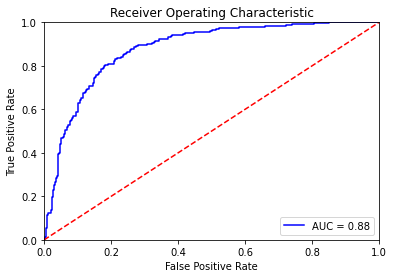

In [136]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = gnb.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


# saving the model

In [137]:
import joblib
joblib.dump(mod, 'redwinemodel.pkl')

['redwinemodel.pkl']

In [138]:
model = joblib.load('redwinemodel.pkl')
prediction = model.predict(x_test)
print('f1 score:',f1_score(y_test, prediction)*100)

f1 score: 81.20649651972158


In [139]:
prediction = pd.DataFrame(prediction)

In [140]:
prediction.to_csv('result.csv')

In [141]:
prediction

,0
0,0
1,0
2,0
3,0
4,0
...,...
820,1
821,1
822,1
823,1
